In [103]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZV9grm7gs5qXcp_iz-YlDBH18PguId-zEXxJzdYErnLu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'carresalevalueprediction-donotdelete-pr-oojlmjcxrgbqxe'
object_key = 'autos_encoded.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [104]:
#importing all necessary libraries for future analysis of the  dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
#Reading the first five rows in csv file using head function in pandas library
df.head()

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [106]:
#Reading the last five rows in csv file using tail function
df.tail()

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,...,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [107]:
data=df.drop(['Unnamed: 0'],axis=1)

In [108]:
#checking the number of rows and columns in a dataset to understand the size that we are working with 
data.shape

(371528, 20)

In [109]:
#checking the size of the dataset 
data.size

7430560

In [110]:
#list of names of each column in a dataset
data.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [111]:
#checking the every datatype of column in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [112]:
#knowing  the total number of unique values in each column using nunique function
data.nunique()

dateCrawled            280500
name                   233531
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 8
yearOfRegistration        155
gearbox                     2
powerPS                   794
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen               182806
dtype: int64

## ***HANDLING MISSING VALUES***

In [113]:
#after looking at the head of the dataset we have NaN and missing values
#To find the of missing values in each column 
#if present it shows true otherwise it shows false
data.isna().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [114]:
#To find the count of missing values each column using sum function
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [115]:
#Finding the description of the dataset using describe function like mean,median etc.,
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [116]:
#Finding the mode of vehicleType column using mode function
data['vehicleType'].mode()

0    limousine
dtype: object

In [117]:
#total value_counts in vehicleType column
data['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [118]:
#Replacing all NaN values in vehicleType column using mode 
data['vehicleType'].fillna("limousine",inplace=True)

In [119]:
#Finding the mode of vehicleType column using mode function
data['gearbox'].mode()

0    manuell
dtype: object

In [120]:
#Replacing all NaN values in gearbox column using mode 
data['gearbox'].fillna("manuell",inplace=True)

In [121]:

#Finding the mode of model column using mode function
data['model'].mode()

0    golf
dtype: object

In [122]:
#Replacing all NaN values in model column using mode 
data['model'].fillna("golf",inplace=True)

In [123]:
#Finding the mode of fueltype column using mode function
data['fuelType'].mode()

0    benzin
dtype: object

In [124]:
#Replacing all NaN values in model column using mode 
data['fuelType'].fillna("benzin",inplace=True)

In [125]:
#Finding the mode of notRepairedDamage column using mode function
data['notRepairedDamage'].mode()

0    nein
dtype: object

In [126]:
#Replacing all NaN values in notRepairedDamage column using mode 
data['notRepairedDamage'].fillna("nein",inplace=True)

In [127]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## ****OUTLIERS DETECTION AND REPLACING OUTLIERS****

In [128]:
#finding the interquartilerange of kilometer column and replacing the outliers with mean 
q1=data['kilometer'].quantile(0.25)
q3=data['kilometer'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
data['kilometer']=np.where(data['kilometer']>upper_bound,data['kilometer'].mean(),np.where(data['kilometer']<lower_bound,data['kilometer'].mean(),data['kilometer']))

<AxesSubplot:xlabel='kilometer'>

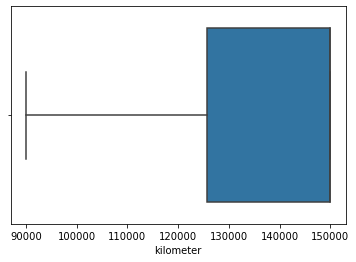

In [129]:
#boxplot for kilometer column
sns.boxplot(data['kilometer'])

<AxesSubplot:xlabel='price'>

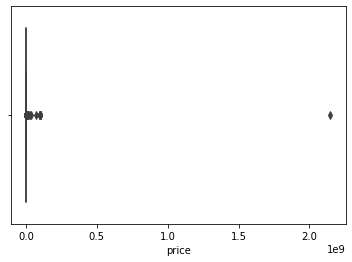

In [130]:
#boxplot for price column
sns.boxplot(data['price'])

In [131]:
data['price'].median()

2950.0

In [132]:
#finding the interquartilerange of kilometer column and replacing the outliers with mean 
q1=data['price'].quantile(0.25)
q3=data['price'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
data['price']=np.where(data['price']>upper_bound,upper_bound,np.where(data['price']<lower_bound,lower_bound,data['price']))

<AxesSubplot:xlabel='price'>

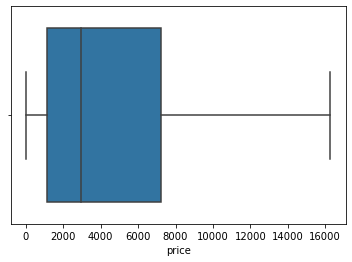

In [133]:
sns.boxplot(data['price'])

In [134]:
#finding the interquartilerange of powerPS column and replacing the outliers with lower_bound,upper_bound
q1=data['powerPS'].quantile(0.25)
q3=data['powerPS'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
data['powerPS']=np.where(data['powerPS']>upper_bound,upper_bound,np.where(data['powerPS']<lower_bound,lower_bound,data['powerPS']))

<AxesSubplot:xlabel='powerPS'>

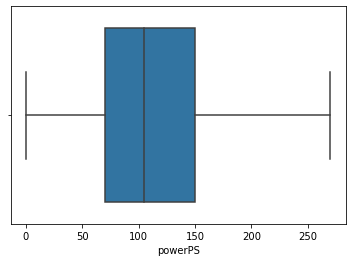

In [135]:
#boxplot for powerPS column
sns.boxplot(data['powerPS'])

In [136]:
#finding the interquartilerange of yearOfRegistration column and replacing the outliers with mean 
q1=data['yearOfRegistration'].quantile(0.25)
q3=data['yearOfRegistration'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
data['yearOfRegistration']=np.where(data['yearOfRegistration']>upper_bound,data['yearOfRegistration'].mode(),np.where(data['yearOfRegistration']<lower_bound,data['yearOfRegistration'].mode(),data['yearOfRegistration']))

<AxesSubplot:xlabel='yearOfRegistration'>

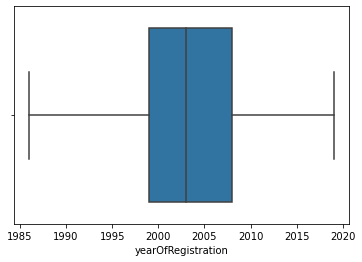

In [137]:
#boxplot for yearOfRegistration column
sns.boxplot(data['yearOfRegistration'])

<AxesSubplot:xlabel='monthOfRegistration'>

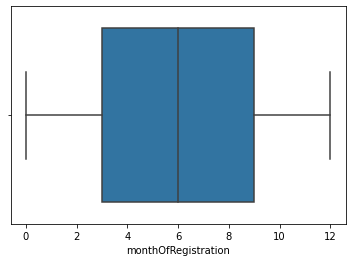

In [138]:
#boxplot for monthOfRegistation column
sns.boxplot(data['monthOfRegistration'])

In [139]:
#Reading the first five rows of cleaned dataset using head function
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,limousine,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,16275.0,test,coupe,2011,manuell,190.0,golf,125000.0,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004,automatik,163.0,grand,125000.0,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# ****EXPLORATORY DATA ANALYSIS****

### **Exploring Categorical Features**

In [140]:
#list of all categorical columns
list(data.select_dtypes('object'))

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'lastSeen']

In [141]:
data['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

<AxesSubplot:xlabel='seller', ylabel='count'>

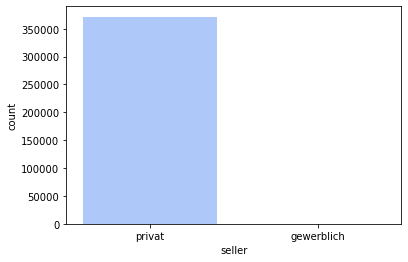

In [142]:
#counting public and gewerblich types in seller column using countplot
sns.countplot(data['seller'],palette='coolwarm',saturation=0.9)

In [143]:
data['abtest'].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

Text(0.5, 1.0, 'abtest')

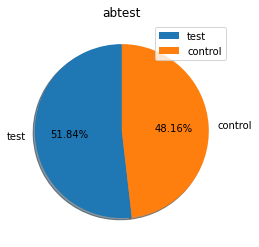

In [144]:
#counting the percentage of different types in abtest column using pie chart
plt.pie(data['abtest'].value_counts(),startangle=90,labels=['test','control'],shadow=True,autopct='%1.2f%%')
plt.legend()
plt.title("abtest")

In [145]:
data['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

<AxesSubplot:xlabel='offerType', ylabel='count'>

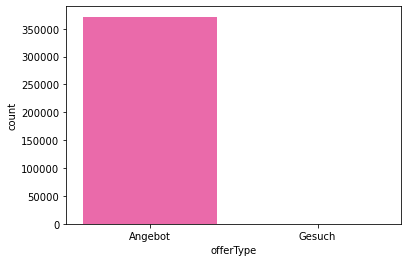

In [146]:
#counting angebot and gesuch types in offerType column using countplot
sns.countplot(data['offerType'],palette='spring')

In [147]:
data['vehicleType'].value_counts()

limousine     133763
kleinwagen     80023
kombi          67564
bus            30201
cabrio         22898
coupe          19015
suv            14707
andere          3357
Name: vehicleType, dtype: int64

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

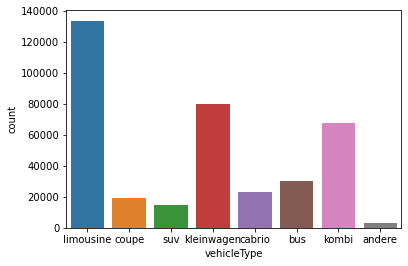

In [148]:

#count of each type in vehicleType column
sns.countplot(data['vehicleType'])

<AxesSubplot:xlabel='gearbox', ylabel='count'>

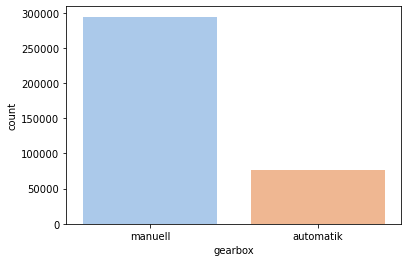

In [149]:
#count of each type in gearbox column
sns.countplot(data['gearbox'],palette='pastel')

In [150]:
data['model'].value_counts()

golf               50554
andere             26400
3er                20567
polo               13092
corsa              12573
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

<AxesSubplot:xlabel='model', ylabel='count'>

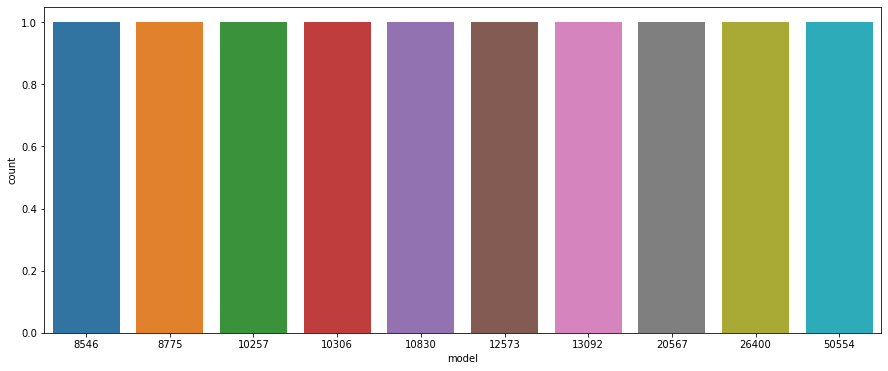

In [151]:
#top 10 models in model column
plt.figure(figsize =(15,6))
sns.countplot(data['model'].value_counts().head(10))

In [152]:
data['fuelType'].value_counts()

benzin     257243
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='count'>

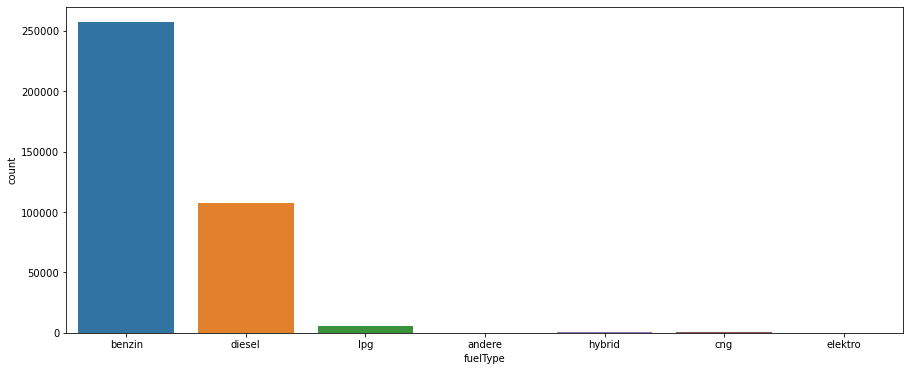

In [153]:
plt.figure(figsize =(15,6))
sns.countplot(data['fuelType'])

In [154]:
data['brand'].value_counts().head()

volkswagen       79640
bmw              40274
opel             40136
mercedes_benz    35309
audi             32873
Name: brand, dtype: int64

<AxesSubplot:xlabel='brand', ylabel='count'>

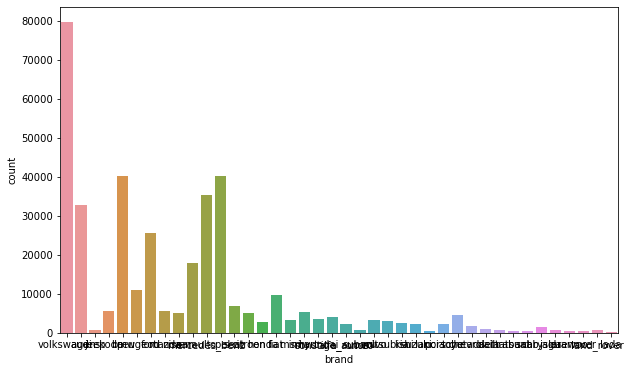

In [155]:
#count of eaach brand in brand column
plt.figure(figsize =(10,6))
sns.countplot(data['brand'])

In [156]:
data['notRepairedDamage'].value_counts()

nein    335242
ja       36286
Name: notRepairedDamage, dtype: int64

<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

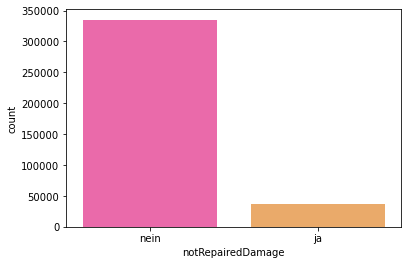

In [157]:
sns.countplot(data['notRepairedDamage'],palette='spring')

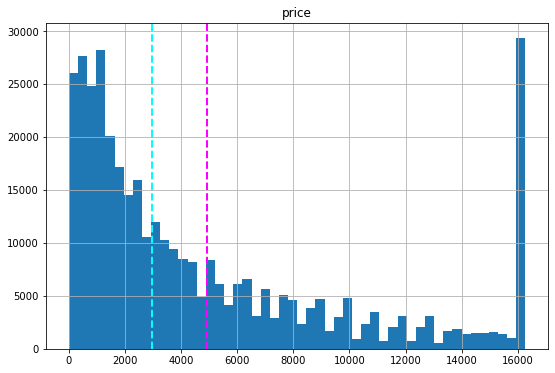

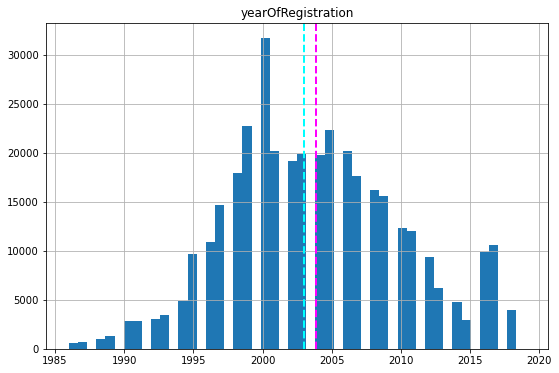

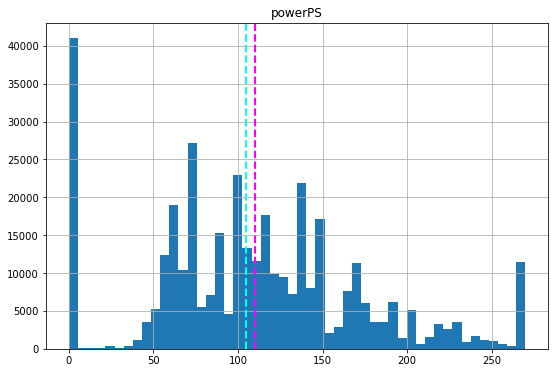

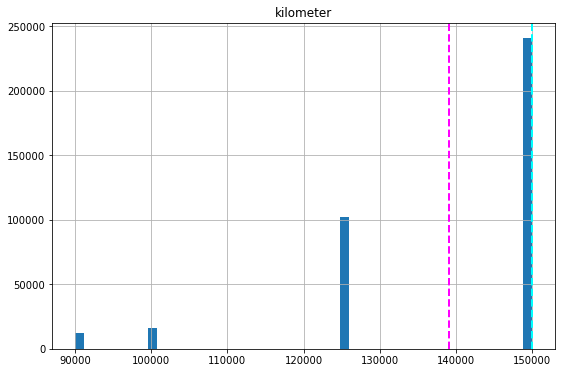

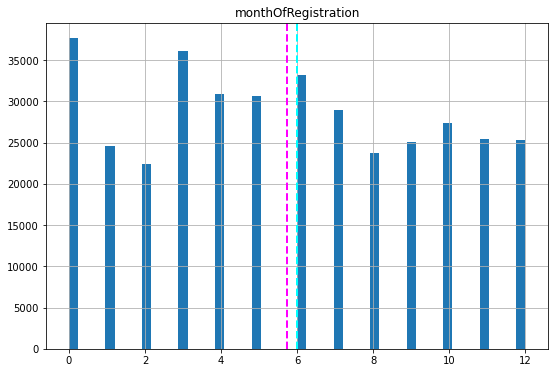

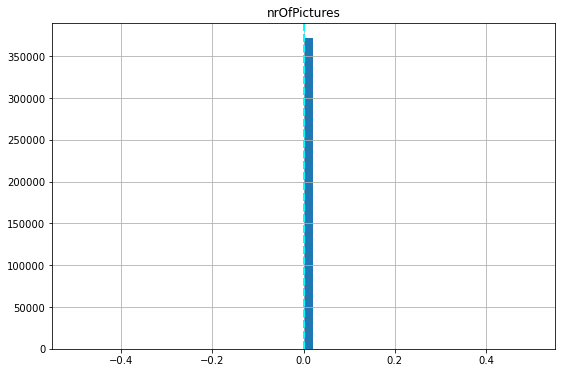

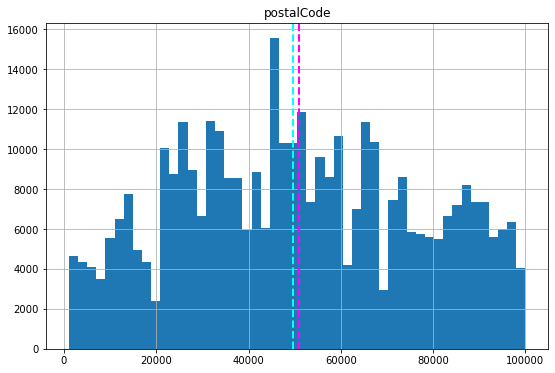

In [158]:
a=list(data.select_dtypes('number'))
for i in a:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[i]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()

In [159]:
#correlation of  dataset using correaltion function 
correlation=data.corr()
correlation

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,0.498059,0.547702,-0.333261,0.107701,NaN,0.092355
yearOfRegistration,0.498059,1.000000,0.148963,-0.250738,0.032619,NaN,0.036769
powerPS,0.547702,0.148963,1.000000,-0.012199,0.133211,NaN,0.087730
kilometer,-0.333261,-0.250738,-0.012199,1.000000,-0.022828,NaN,-0.028500
monthOfRegistration,0.107701,0.032619,0.133211,-0.022828,1.000000,NaN,0.014963
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,0.092355,0.036769,0.087730,-0.028500,0.014963,NaN,1.000000


<AxesSubplot:>

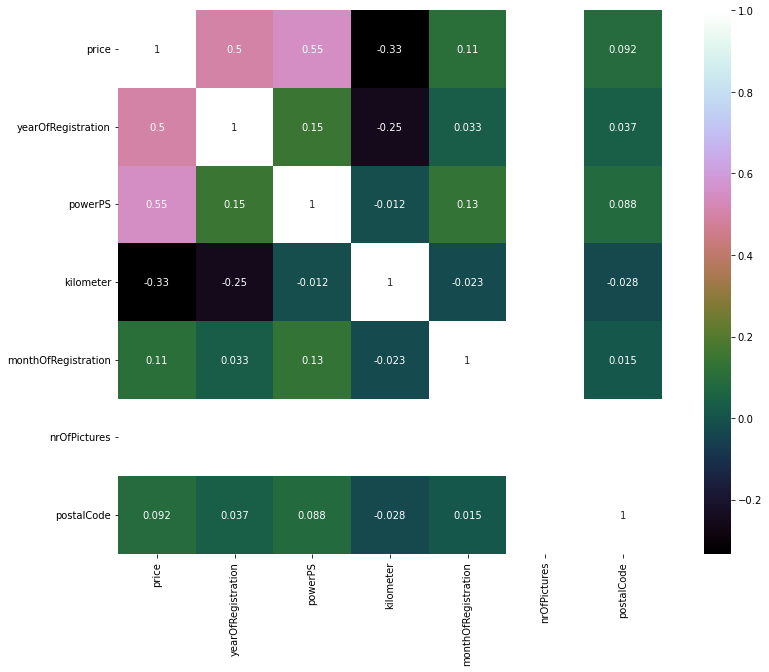

In [160]:
#exploring the correlation using heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

## 1.SELLER VS PRICE 

<AxesSubplot:xlabel='seller', ylabel='price'>

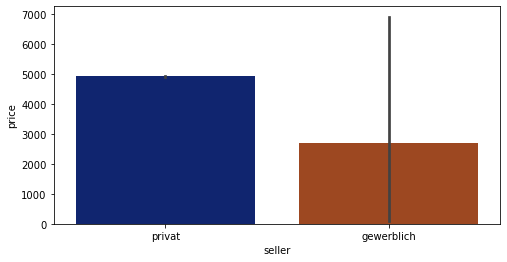

In [161]:
plt.figure(figsize=(8,4))
sns.barplot(x='seller',y='price',data=data,palette='dark')

## 2.VEHICLETYPE VS PRICE

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

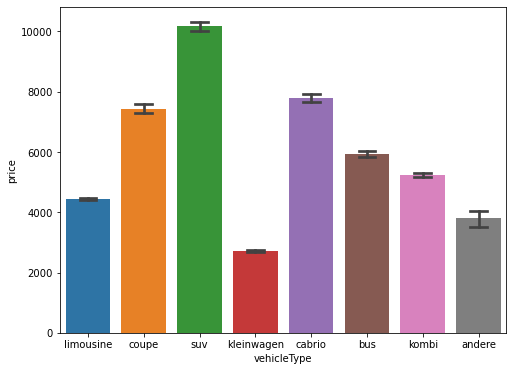

In [162]:
plt.figure(figsize=(8,6))
sns.barplot(x='vehicleType',y='price',data=data,ci=100,capsize=0.3,saturation=0.8)

## 3.MODEL  VS  PRICE

<AxesSubplot:xlabel='model', ylabel='price'>

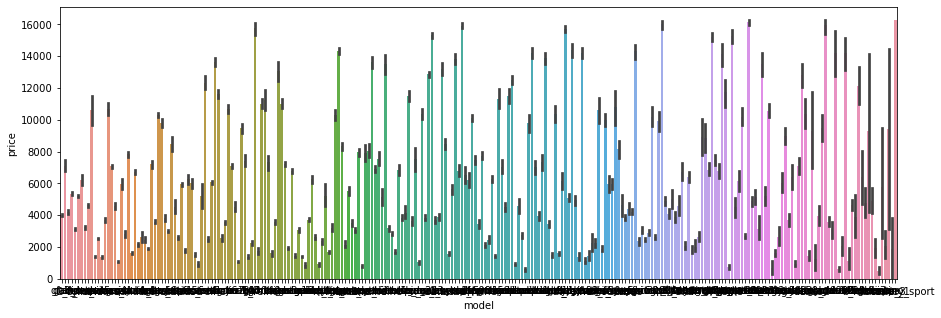

In [163]:
plt.figure(figsize=(15,5))
sns.barplot(x='model',y='price',data=data)

## 4.KILOMETER VS PRICE


<AxesSubplot:xlabel='kilometer', ylabel='price'>

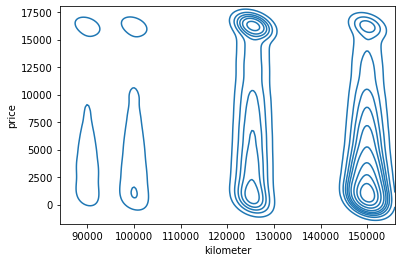

In [164]:
sns.kdeplot(data['kilometer'],data['price'],palette='husl')

## 5.BRAND VS PRICE

<AxesSubplot:xlabel='brand', ylabel='price'>

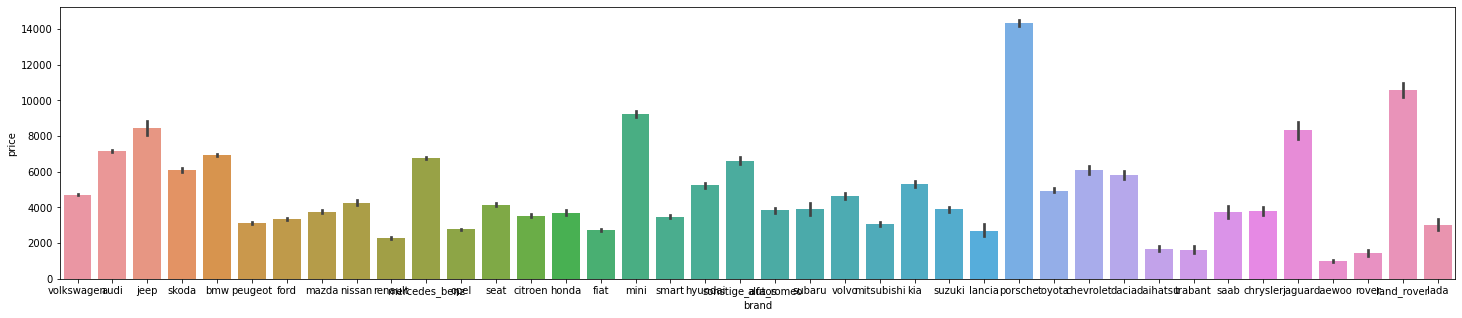

In [165]:
plt.figure(figsize=(25,5))
sns.barplot(x='brand',y='price',data=data)

# 6. YEAR OF REGISTRATION   VS   PRICE

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

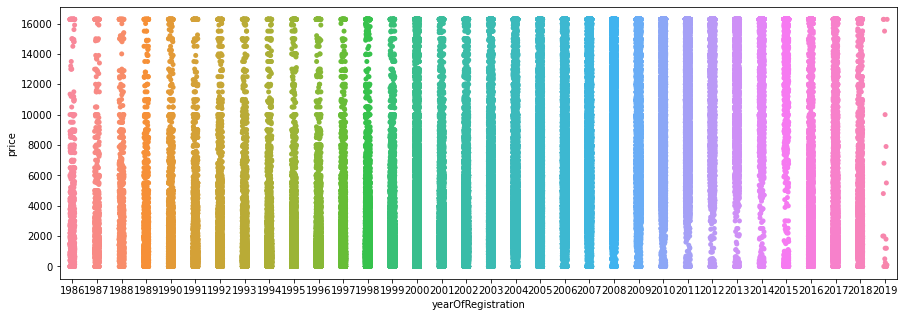

In [166]:
plt.figure(figsize=(15,5))
sns.stripplot(x='yearOfRegistration',y='price',data=data)

# 7.FUEL TYPE   VS  PRICE

<AxesSubplot:xlabel='fuelType', ylabel='price'>

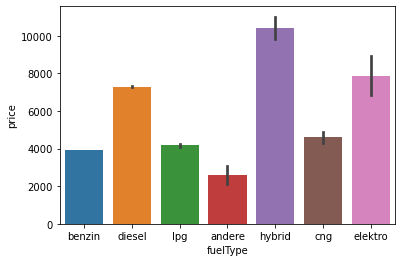

In [167]:
sns.barplot(x='fuelType',y='price',data=data)

# 8.GEARBOX VS KILOMETER

<AxesSubplot:xlabel='gearbox', ylabel='kilometer'>

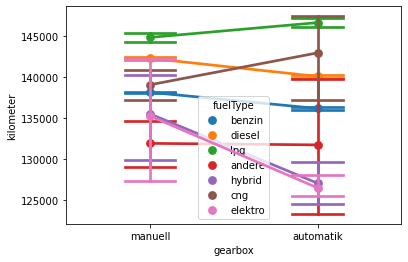

In [168]:
sns.pointplot(x='gearbox',y='kilometer',hue='fuelType',data=data,ci=99,saturation=0.8,capsize=0.3)


# 9.KILOMETER VS PRICE

<AxesSubplot:xlabel='fuelType', ylabel='kilometer'>

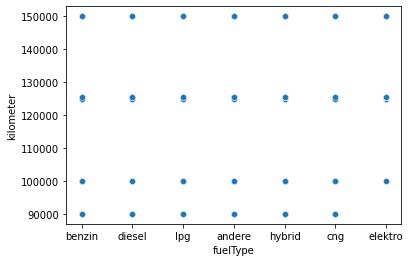

In [169]:
sns.scatterplot(x='fuelType',y='kilometer',data=data)


## DISTRIBUTION PLOT 

<AxesSubplot:xlabel='price', ylabel='Density'>

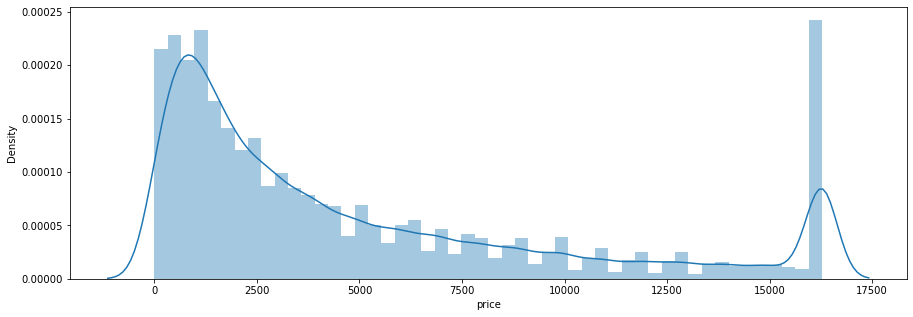

In [170]:
#examing the distribution of price column using distplot in seaborn library
plt.figure(figsize=(15,5))
sns.distplot(data['price'])

In [171]:
parameters={'seller':{'privat':0,'gewerblich':1},
            'abtest':{'test':0,'control':1},
            'notRepairedDamage':{'nein':0,'ja':1},
            'vehicleType':{'limousine':0,'kleinwagen':1,'kombi':2,'bus':3,'cabrio':4,'coupe':5,'suv':6,'andere':7},
            'fuelType':{'benzin':0,'diesel':1,'lpg':2,'cng':3 ,'hybrid':4,'andere':5,'elektro':6}}
data_df=data.replace(parameters)
data_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,0,Angebot,480.0,0,0,1993,manuell,0.0,golf,150000.0,0,0,volkswagen,0,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,0,Angebot,16275.0,0,5,2011,manuell,190.0,golf,125000.0,5,1,audi,1,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",0,Angebot,9800.0,0,6,2004,automatik,163.0,grand,125000.0,8,1,jeep,0,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,0,Angebot,1500.0,0,1,2001,manuell,75.0,golf,150000.0,6,0,volkswagen,0,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,0,Angebot,3600.0,0,1,2008,manuell,69.0,fabia,90000.0,7,1,skoda,0,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [172]:
#converting all catogorical columns into numerical columns using get_dummies function
Fe_df_cleaned=pd.get_dummies(data_df,columns=['offerType','gearbox'],drop_first=True)
Fe_df_cleaned.head()

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,offerType_Gesuch,gearbox_manuell
0,2016-03-24 11:52:17,Golf_3_1.6,0,480.0,0,0,1993,0.0,golf,150000.0,0,0,volkswagen,0,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,0,1
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,0,16275.0,0,5,2011,190.0,golf,125000.0,5,1,audi,1,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,0,1
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",0,9800.0,0,6,2004,163.0,grand,125000.0,8,1,jeep,0,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,0,0
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,0,1500.0,0,1,2001,75.0,golf,150000.0,6,0,volkswagen,0,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,0,1
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,0,3600.0,0,1,2008,69.0,fabia,90000.0,7,1,skoda,0,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,0,1


In [173]:
#shape of the dataset after label encoding
Fe_df_cleaned.shape

(371528, 20)

In [174]:
Fe_df_cleaned.columns

Index(['dateCrawled', 'name', 'seller', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen',
       'offerType_Gesuch', 'gearbox_manuell'],
      dtype='object')

In [175]:
#removing unncessary columns in the dataseset
main_df=Fe_df_cleaned.drop(columns=['dateCrawled','dateCreated','name','lastSeen','brand','model'],axis=1)
main_df.head()

,seller,price,abtest,vehicleType,yearOfRegistration,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage,nrOfPictures,postalCode,offerType_Gesuch,gearbox_manuell
0,0,480.0,0,0,1993,0.0,150000.0,0,0,0,0,70435,0,1
1,0,16275.0,0,5,2011,190.0,125000.0,5,1,1,0,66954,0,1
2,0,9800.0,0,6,2004,163.0,125000.0,8,1,0,0,90480,0,0
3,0,1500.0,0,1,2001,75.0,150000.0,6,0,0,0,91074,0,1
4,0,3600.0,0,1,2008,69.0,90000.0,7,1,0,0,60437,0,1


<Figure size 1080x360 with 0 Axes>

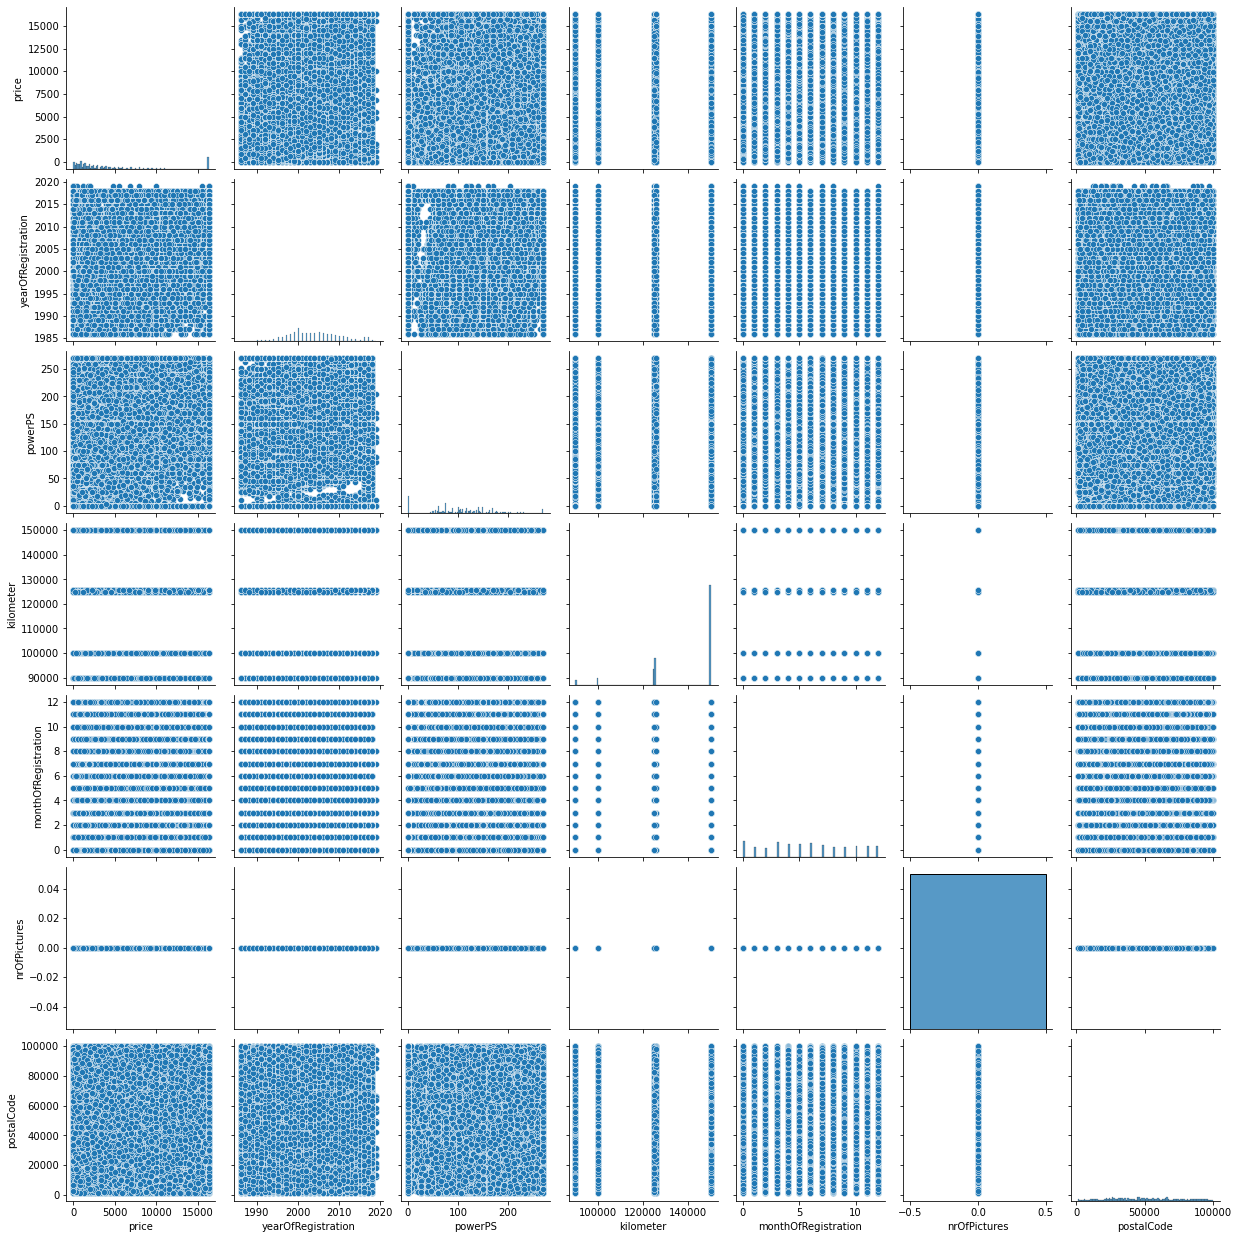

In [176]:
#multivariate analysis
plt.figure(figsize=(15,5))
sns.pairplot(data)

In [177]:
#dividing the dataset into dependent and independent feature
Independent=main_df.drop(['price'],axis=1)
Dependent=main_df['price']
Independent.head()

,seller,abtest,vehicleType,yearOfRegistration,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage,nrOfPictures,postalCode,offerType_Gesuch,gearbox_manuell
0,0,0,0,1993,0.0,150000.0,0,0,0,0,70435,0,1
1,0,0,5,2011,190.0,125000.0,5,1,1,0,66954,0,1
2,0,0,6,2004,163.0,125000.0,8,1,0,0,90480,0,0
3,0,0,1,2001,75.0,150000.0,6,0,0,0,91074,0,1
4,0,0,1,2008,69.0,90000.0,7,1,0,0,60437,0,1


In [178]:
Dependent.head()

0      480.0
1    16275.0
2     9800.0
3     1500.0
4     3600.0
Name: price, dtype: float64

## STANDARDIZATION

In [179]:
#importing standardscalar from scikitlearn to standardize data values into standard format
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(Independent),columns=Independent.columns)

In [180]:
scaled.head()

,seller,abtest,vehicleType,yearOfRegistration,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage,nrOfPictures,postalCode,offerType_Gesuch,gearbox_manuell
0,-0.002842,-0.963931,-0.914283,-1.683521,-1.712930,0.659092,-1.544670,-0.616646,-0.328996,0.0,0.760274,-0.005683,0.511747
1,-0.002842,-0.963931,1.896897,1.113393,1.237690,-0.846937,-0.197835,1.246101,3.039553,0.0,0.625346,-0.005683,0.511747
2,-0.002842,-0.963931,2.459133,0.025704,0.818391,-0.846937,0.610266,1.246101,-0.328996,0.0,1.537240,-0.005683,-1.954090
3,-0.002842,-0.963931,-0.352047,-0.440448,-0.548212,0.659092,0.071532,-0.616646,-0.328996,0.0,1.560264,-0.005683,0.511747
4,-0.002842,-0.963931,-0.352047,0.647241,-0.641389,-2.955376,0.340899,1.246101,-0.328996,0.0,0.372740,-0.005683,0.511747


## ***DIVIDING DATA INTO TRAIN AND TEST***

In [181]:
#divivng the dataset into train and test using train_test_split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled,Dependent,test_size=0.25,random_state=0)

In [182]:
#shape of the training data
x_train.shape

(278646, 13)

In [183]:
#shape of the test data
x_test.shape

(92882, 13)

In [184]:
#Independent features of  training data after dividing training and testing
x_train.head()

,seller,abtest,vehicleType,yearOfRegistration,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage,nrOfPictures,postalCode,offerType_Gesuch,gearbox_manuell
43344,-0.002842,-0.963931,-0.352047,0.025704,-0.719037,0.659092,-0.467202,1.246101,3.039553,0.0,0.009471,-0.005683,0.511747
253492,-0.002842,-0.963931,0.772425,0.647241,-0.004677,-0.846937,-1.005936,1.246101,-0.328996,0.0,-1.049561,-0.005683,0.511747
243201,-0.002842,1.037418,0.210189,0.647241,0.228267,-0.846937,1.418367,-0.616646,-0.328996,0.0,0.640540,-0.005683,0.511747
317331,-0.002842,-0.963931,-0.914283,0.181089,-1.712930,0.659092,-1.544670,1.246101,-0.328996,0.0,0.334056,-0.005683,0.511747
356702,-0.002842,1.037418,1.896897,1.734930,2.480056,-0.809666,0.610266,-0.616646,-0.328996,0.0,1.162149,-0.005683,-1.954090


In [185]:
#Dependent feature of tetsing data after dividing training and testing 
y_train.head()

43344      1500.0
253492     3500.0
243201     6990.0
317331     2500.0
356702    16275.0
Name: price, dtype: float64

## ***MODEL I : RANDOMFOREST REGRESSOR***

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
#training the data to randomforestregression algorithm
rfr=RandomForestRegressor()
model=rfr.fit(x_train,y_train)

In [188]:
#predicting the test data
y_pred=model.predict(x_test)

## ***EVALUATION METRICS***

In [189]:
#importing necessary libraries to find evaluation of the model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [190]:
#mean squared error
MSE=mean_squared_error(y_test,y_pred)
print("MSE:",MSE)

MSE: 3833370.166150439


In [191]:
#Root mean squared error
RMSE=math.sqrt(MSE)
print("RMSE:",RMSE)

RMSE: 1957.899426975359


In [192]:
#checking the performance of the model using r2_score 
r2=r2_score(y_test,y_pred)
print("R2_score:",r2)

R2_score: 0.841093857954911


In [193]:
#Adjusted R square
Adjusted_R2=1-(1-r2*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2:",Adjusted_R2)

Adjusted R2: 0.8412115973285749


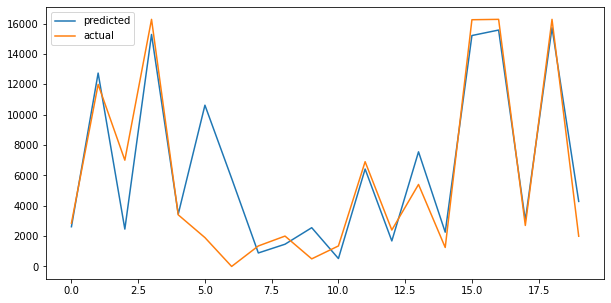

In [194]:
#plot for predicted and actual price 
plt.figure(figsize=(10,5))
plt.plot(y_pred[0:20])
plt.plot(np.array(y_test[0:20]))
plt.legend(["predicted","actual"])
plt.show()

In [195]:
print("The accuracy of the RandomForestRegression:",r2)

The accuracy of the RandomForestRegression: 0.841093857954911


In [196]:
model.predict([[0,1,1,2002,184,75637,5,1,1,0,948523,1,0]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9859.76])

## IBM DEPLOYMENT

In [197]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [198]:
from ibm_watson_machine_learning import APIClient
import json


## Authenticate and Set Space

In [208]:
wml_credentials = {
    "apikey":"ALe72trXqRm4Zb-fDsHL-vHrUe7BMocqRmu5PJbcoUWe",
    "url":"https://eu-de.ml.cloud.ibm.com"
}

In [209]:
wml_client = APIClient(wml_credentials)

In [210]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------------  ------------------------
ID                                    NAME                         CREATED
6dad6f48-92c5-4776-b276-4216be2dc524  Car Resale Value Prediction  2022-11-07T13:33:09.651Z
------------------------------------  ---------------------------  ------------------------


In [211]:
SPACE_ID="6dad6f48-92c5-4776-b276-4216be2dc524"

In [212]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [213]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

## SAVE AND DEPLOY THE MODEL

In [215]:
import sklearn
sklearn.__version__

'1.0.2'

In [216]:
MODEL_NAME = 'Car Resale Value Prediction'
DEPLOYMENT_NAME = 'Car Resale Value Prediction'
DEMO_MODEL = model

In [217]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [218]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [ ]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train